CLUSTERING CON DATOS ORIGINALES - SISTEMA DE ENTREGAS (K=3)
📂 Cargando datos originales...
✅ Datos cargados: (1000, 20)

🔍 Preparando datos para clustering...
✅ Variables seleccionadas: 20
   Shape: (1000, 20)
✅ Datos estandarizados

🔍 APLICANDO K-MEANS CON K=3
   ✅ Clustering completado
   📊 Inercia: 16322.23
   📈 Silhouette Score: 0.118

📈 DISTRIBUCIÓN DE ENTREGAS:
   Cluster 0: 279 entregas (27.9%)
   Cluster 1: 392 entregas (39.2%)
   Cluster 2: 329 entregas (32.9%)

ANÁLISIS DE CLUSTERS

📊 MEDIAS POR CLUSTER:
         TraficoPico  RiesgoRuta  Distancia_km  TiempoEstimado_min  \
Cluster                                                              
0               0.90        0.74        181.22              224.62   
1               0.77        0.54        109.28              116.98   
2               1.13        0.96        256.30              314.10   

         TiempoReal_min  Demora_min   Peso_kg  ExperienciaConductor_anios  \
Cluster                                             

C:\Users\alexi\AppData\Local\Temp\ipykernel_10468\4279157438.py:175: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(demoras_data, labels=[f'C{i}' for i in range(3)],


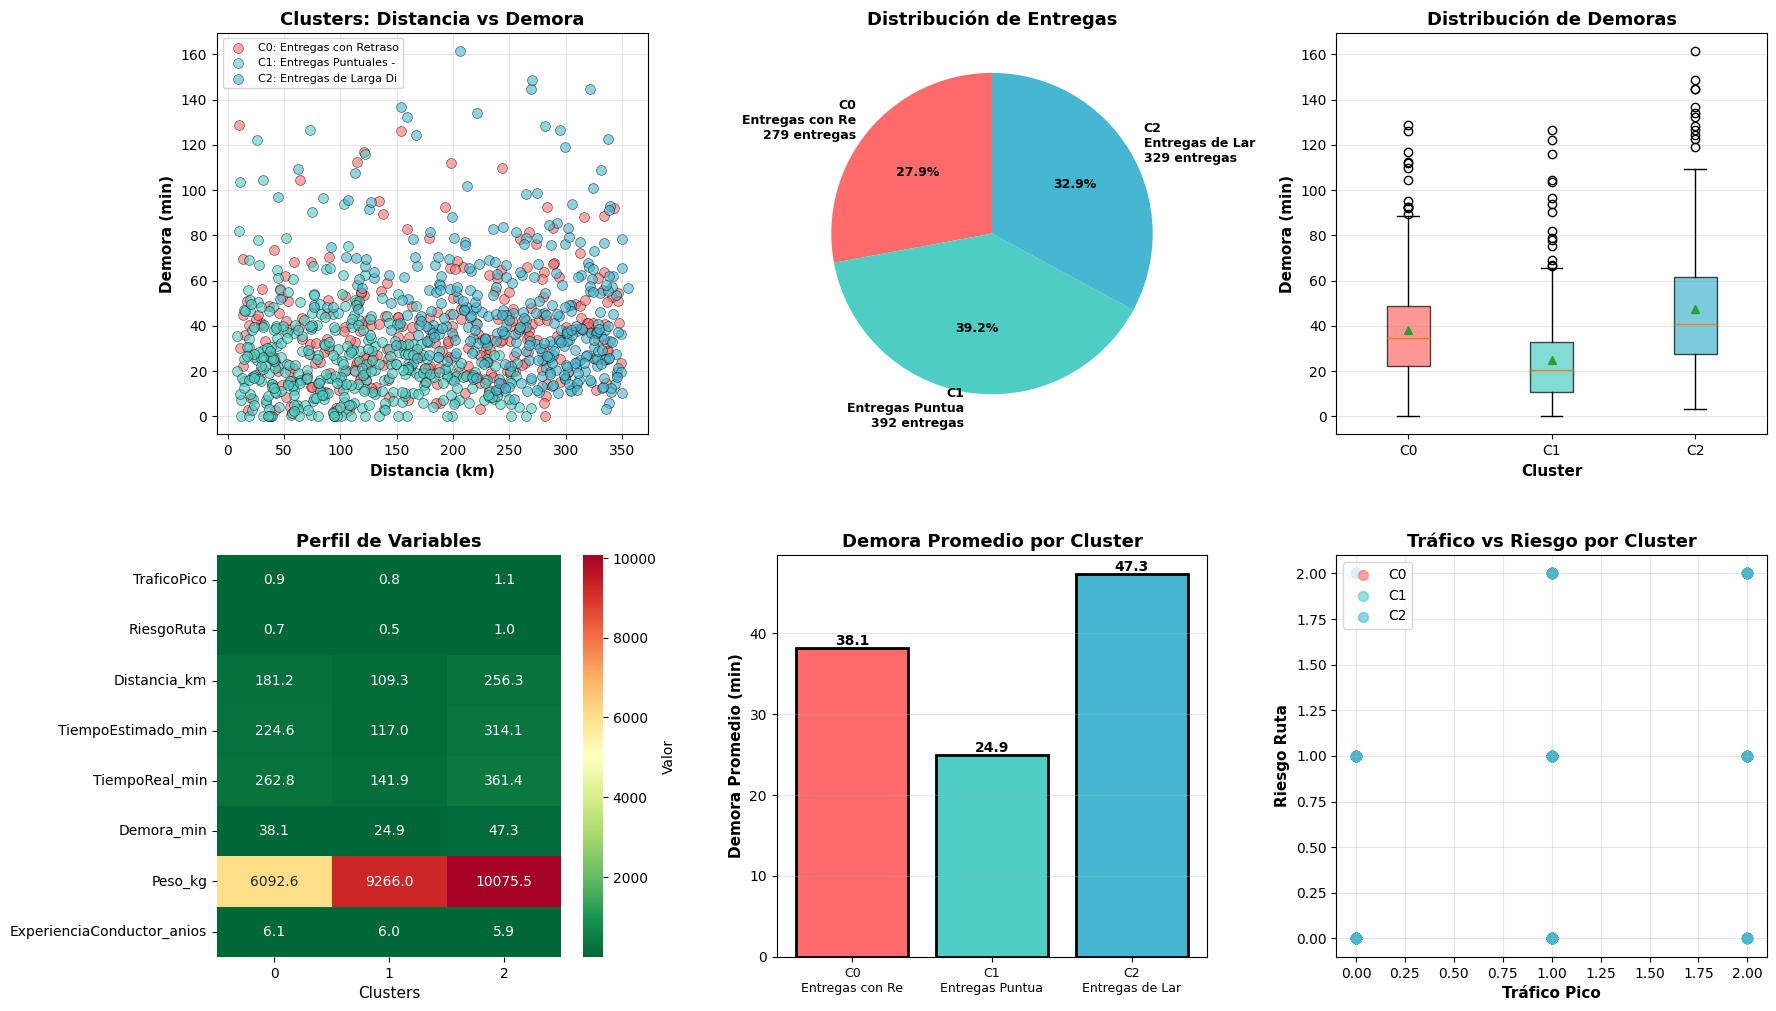

✅ Visualización guardada: clustering_entregas_original.png

RESUMEN EJECUTIVO

🎉 ANÁLISIS COMPLETADO
   📊 Método: K-Means sobre datos originales estandarizados
   🎯 Silhouette Score: 0.118
   📦 Total entregas: 1,000
   📐 Variables utilizadas: 20

🏷️ PERFILES IDENTIFICADOS:

   1. Entregas con Retraso Moderado
      📊 279 entregas (27.9%)
      ⏱️  Demora: 38.1 min
      📏 Distancia: 181.2 km
      🚦 Tráfico: 0.90

   2. Entregas Puntuales - Condiciones Favorables
      📊 392 entregas (39.2%)
      ⏱️  Demora: 24.9 min
      📏 Distancia: 109.3 km
      🚦 Tráfico: 0.77

   3. Entregas de Larga Distancia
      📊 329 entregas (32.9%)
      ⏱️  Demora: 47.3 min
      📏 Distancia: 256.3 km
      🚦 Tráfico: 1.13

💼 APLICACIONES:
   • Optimización de rutas por perfil
   • Asignación inteligente de recursos
   • Predicción de demoras
   • Mejora en planificación logística

✨ ANÁLISIS COMPLETADO

✅ Resultados exportados: entregas_con_clusters.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

print("=" * 70)
print("CLUSTERING CON DATOS ORIGINALES - SISTEMA DE ENTREGAS (K=3)")
print("=" * 70)

# 1. Cargar datos originales
print("📂 Cargando datos originales...")
df_original = pd.read_csv('archivo_completo.csv')
print(f"✅ Datos cargados: {df_original.shape}")

# 2. Preparar datos para clustering (todas las variables)
print("\n🔍 Preparando datos para clustering...")
feature_columns = [
    'TraficoPico', 'RiesgoRuta', 'Distancia_km', 'TiempoEstimado_min',
    'TiempoReal_min', 'Demora_min', 'Peso_kg', 'ExperienciaConductor_anios',
    'AntiguedadCamion_anios', 'FallasMecanicas', 'NivelCombustible_pct',
    'Clima_Bueno', 'Clima_Lluvia', 'Clima_Tormenta',
    'TipoCarga_Fragil', 'TipoCarga_Normal', 'TipoCarga_Peligrosa',
    'HorarioSalida_Manana', 'HorarioSalida_Noche', 'HorarioSalida_Tarde'
]

X = df_original[feature_columns].values
print(f"✅ Variables seleccionadas: {len(feature_columns)}")
print(f"   Shape: {X.shape}")

# 3. Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"✅ Datos estandarizados")

# 4. Aplicar K-Means con k=3
print(f"\n🔍 APLICANDO K-MEANS CON K=3")
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10, max_iter=300)
clusters = kmeans.fit_predict(X_scaled)

# Métricas
silhouette_avg = silhouette_score(X_scaled, clusters)
inertia = kmeans.inertia_

print(f"   ✅ Clustering completado")
print(f"   📊 Inercia: {inertia:.2f}")
print(f"   📈 Silhouette Score: {silhouette_avg:.3f}")

# 5. Distribución de clusters
df_original['Cluster'] = clusters
cluster_counts = pd.Series(clusters).value_counts().sort_index()

print(f"\n📈 DISTRIBUCIÓN DE ENTREGAS:")
for cluster, count in cluster_counts.items():
    percentage = (count / len(clusters)) * 100
    print(f"   Cluster {cluster}: {count:,} entregas ({percentage:.1f}%)")

# 6. Variables para análisis
numeric_vars = [
    'TraficoPico', 'RiesgoRuta', 'Distancia_km', 'TiempoEstimado_min',
    'TiempoReal_min', 'Demora_min', 'Peso_kg', 'ExperienciaConductor_anios',
    'AntiguedadCamion_anios', 'FallasMecanicas', 'NivelCombustible_pct'
]

clima_vars = ['Clima_Bueno', 'Clima_Lluvia', 'Clima_Tormenta']
carga_vars = ['TipoCarga_Fragil', 'TipoCarga_Normal', 'TipoCarga_Peligrosa']
horario_vars = ['HorarioSalida_Manana', 'HorarioSalida_Noche', 'HorarioSalida_Tarde']

# 7. Estadísticas por cluster
print(f"\n" + "=" * 80)
print("ANÁLISIS DE CLUSTERS")
print("=" * 80)

print(f"\n📊 MEDIAS POR CLUSTER:")
means_numeric = df_original.groupby('Cluster')[numeric_vars].mean().round(2)
print(means_numeric)

print(f"\n📊 DISTRIBUCIÓN DE CLIMA POR CLUSTER:")
clima_pct = df_original.groupby('Cluster')[clima_vars].mean() * 100
clima_pct.columns = ['Bueno (%)', 'Lluvia (%)', 'Tormenta (%)']
print(clima_pct.round(1))

print(f"\n📊 DISTRIBUCIÓN DE TIPO DE CARGA POR CLUSTER:")
carga_pct = df_original.groupby('Cluster')[carga_vars].mean() * 100
carga_pct.columns = ['Frágil (%)', 'Normal (%)', 'Peligrosa (%)']
print(carga_pct.round(1))

print(f"\n📊 DISTRIBUCIÓN DE HORARIO POR CLUSTER:")
horario_pct = df_original.groupby('Cluster')[horario_vars].mean() * 100
horario_pct.columns = ['Mañana (%)', 'Noche (%)', 'Tarde (%)']
print(horario_pct.round(1))

# 8. Interpretación de clusters
def interpretar_cluster(cluster_idx, cluster_data):
    """Genera interpretación basada en características del cluster"""
    demora = cluster_data['Demora_min'].mean()
    distancia = cluster_data['Distancia_km'].mean()
    trafico = cluster_data['TraficoPico'].mean()
    riesgo = cluster_data['RiesgoRuta'].mean()
    
    # Clasificación de desempeño
    if demora < 20 and distancia < 150:
        return "Entregas Express Eficientes"
    elif demora > 40 and (trafico >= 1.5 or riesgo >= 1.5):
        return "Entregas de Alto Riesgo"
    elif distancia > 250:
        return "Entregas de Larga Distancia"
    elif demora < 25:
        return "Entregas Puntuales - Condiciones Favorables"
    else:
        return "Entregas con Retraso Moderado"

print(f"\n" + "=" * 80)
print("PERFILES DE CLUSTERS")
print("=" * 80)

cluster_names = {}
for cluster in range(3):
    cluster_data = df_original[df_original['Cluster'] == cluster]
    nombre = interpretar_cluster(cluster, cluster_data)
    cluster_names[cluster] = nombre
    
    print(f"\n🏷️ CLUSTER {cluster}: {nombre}")
    print(f"   👥 Tamaño: {len(cluster_data):,} entregas ({len(cluster_data)/len(df_original)*100:.1f}%)")
    print(f"\n   📊 Métricas Clave:")
    print(f"      • Demora promedio: {cluster_data['Demora_min'].mean():.1f} min")
    print(f"      • Distancia promedio: {cluster_data['Distancia_km'].mean():.1f} km")
    print(f"      • Tráfico promedio: {cluster_data['TraficoPico'].mean():.2f}")
    print(f"      • Riesgo promedio: {cluster_data['RiesgoRuta'].mean():.2f}")
    
    # Nivel de servicio
    if cluster_data['Demora_min'].mean() > 40:
        nivel = "❌ BAJO - Requiere atención"
    elif cluster_data['Demora_min'].mean() > 25:
        nivel = "⚠️ MEDIO - Monitorear"
    else:
        nivel = "✅ ALTO - Desempeño óptimo"
    print(f"\n   🎭 Nivel de Servicio: {nivel}")

# 9. Visualizaciones
print(f"\n🎨 GENERANDO VISUALIZACIONES...")

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Subplot 1: Scatter Distancia vs Demora
ax1 = fig.add_subplot(gs[0, 0])
for i in range(3):
    mask = clusters == i
    ax1.scatter(df_original[mask]['Distancia_km'], 
               df_original[mask]['Demora_min'],
               c=colors[i], label=f'C{i}: {cluster_names[i][:20]}', 
               alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Distancia (km)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Demora (min)', fontsize=11, fontweight='bold')
ax1.set_title('Clusters: Distancia vs Demora', fontsize=13, fontweight='bold')
ax1.legend(fontsize=8)
ax1.grid(True, alpha=0.3)

# Subplot 2: Distribución de entregas
ax2 = fig.add_subplot(gs[0, 1])
wedges, texts, autotexts = ax2.pie(cluster_counts.values, 
                                     labels=[f'C{i}\n{cluster_names[i][:15]}\n{count} entregas' 
                                            for i, count in enumerate(cluster_counts.values)],
                                     colors=colors, startangle=90, autopct='%1.1f%%',
                                     textprops={'fontsize': 9, 'weight': 'bold'})
ax2.set_title('Distribución de Entregas', fontsize=13, fontweight='bold')

# Subplot 3: Boxplot demoras
ax3 = fig.add_subplot(gs[0, 2])
demoras_data = [df_original[df_original['Cluster'] == i]['Demora_min'].values for i in range(3)]
bp = ax3.boxplot(demoras_data, labels=[f'C{i}' for i in range(3)],
                 patch_artist=True, showmeans=True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax3.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax3.set_ylabel('Demora (min)', fontsize=11, fontweight='bold')
ax3.set_title('Distribución de Demoras', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# Subplot 4: Heatmap medias
ax4 = fig.add_subplot(gs[1, 0])
means_plot = means_numeric.iloc[:, :8].T
sns.heatmap(means_plot, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            ax=ax4, cbar_kws={'label': 'Valor'})
ax4.set_title('Perfil de Variables', fontsize=13, fontweight='bold')
ax4.set_xlabel('Clusters', fontsize=11)

# Subplot 5: Comparación demoras
ax5 = fig.add_subplot(gs[1, 1])
demoras_mean = [df_original[df_original['Cluster'] == i]['Demora_min'].mean() for i in range(3)]
bars = ax5.bar(range(3), demoras_mean, color=colors, edgecolor='black', linewidth=2)
ax5.set_xticks(range(3))
ax5.set_xticklabels([f'C{i}\n{cluster_names[i][:15]}' for i in range(3)], fontsize=9)
ax5.set_ylabel('Demora Promedio (min)', fontsize=11, fontweight='bold')
ax5.set_title('Demora Promedio por Cluster', fontsize=13, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, demoras_mean):
    ax5.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

# Subplot 6: Scatter Tráfico vs Riesgo
ax6 = fig.add_subplot(gs[1, 2])
for i in range(3):
    mask = clusters == i
    ax6.scatter(df_original[mask]['TraficoPico'], 
               df_original[mask]['RiesgoRuta'],
               c=colors[i], label=f'C{i}', alpha=0.6, s=50)
ax6.set_xlabel('Tráfico Pico', fontsize=11, fontweight='bold')
ax6.set_ylabel('Riesgo Ruta', fontsize=11, fontweight='bold')
ax6.set_title('Tráfico vs Riesgo por Cluster', fontsize=13, fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.savefig('clustering_entregas_original.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Visualización guardada: clustering_entregas_original.png")

# 10. Resumen ejecutivo
print(f"\n" + "=" * 80)
print("RESUMEN EJECUTIVO")
print("=" * 80)

print(f"\n🎉 ANÁLISIS COMPLETADO")
print(f"   📊 Método: K-Means sobre datos originales estandarizados")
print(f"   🎯 Silhouette Score: {silhouette_avg:.3f}")
print(f"   📦 Total entregas: {len(df_original):,}")
print(f"   📐 Variables utilizadas: {len(feature_columns)}")

print(f"\n🏷️ PERFILES IDENTIFICADOS:")
for cluster in range(3):
    data = df_original[df_original['Cluster'] == cluster]
    print(f"\n   {cluster+1}. {cluster_names[cluster]}")
    print(f"      📊 {len(data):,} entregas ({len(data)/len(df_original)*100:.1f}%)")
    print(f"      ⏱️  Demora: {data['Demora_min'].mean():.1f} min")
    print(f"      📏 Distancia: {data['Distancia_km'].mean():.1f} km")
    print(f"      🚦 Tráfico: {data['TraficoPico'].mean():.2f}")

print(f"\n💼 APLICACIONES:")
print(f"   • Optimización de rutas por perfil")
print(f"   • Asignación inteligente de recursos")
print(f"   • Predicción de demoras")
print(f"   • Mejora en planificación logística")

print(f"\n{'='*80}")
print("✨ ANÁLISIS COMPLETADO")
print("="*80)

# 11. Exportar resultados
df_original.to_csv('entregas_con_clusters.csv', index=False)
print("\n✅ Resultados exportados: entregas_con_clusters.csv")